### Labour market impact


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import geopandas as gpd



In [2]:
df = pd.read_csv

In [3]:


# Function to load, preprocess, and standardize column names
def load_and_preprocess(file_path, file_type='csv', skiprows=1, trim_rows=7):
    if file_type == 'csv':
        df = pd.read_csv(file_path, encoding='latin1', skiprows=skiprows)
    elif file_type == 'xlsx':
        df = pd.read_excel(file_path, skiprows=skiprows)
    else:
        raise ValueError("Unsupported file type")
    
    # Remove the last 'trim_rows' rows
    df = df.iloc[:-trim_rows]
    
    # Standardize column names
    if 'Stream' in df.columns:
        df.rename(columns={
            'Stream': 'Program Stream',
            'Occupations under NOC 2011': 'Occupation',
            'Positions Approved': 'Approved Positions'
        }, inplace=True)
        df['Incorporate Status'] = None  # Add missing column with None values
        df['Approved LMIAs'] = None  # Add missing column with None values
    else:
        df.rename(columns={
            'Program Stream': 'Program Stream',
            'Occupation': 'Occupation',
            'Approved Positions': 'Approved Positions'
        }, inplace=True)
    
    # Ensure all necessary columns are present
    required_columns = [
        'Province/Territory', 'Program Stream', 'Employer', 'Address', 
        'Occupation', 'Incorporate Status', 'Approved LMIAs', 'Approved Positions'
    ]
    for col in required_columns:
        if col not in df.columns:
            df[col] = None
    
    # Extract year from file name and add as a new column
    file_name = file_path.split('/')[-1]
    year_match = re.search(r'(\d{4})', file_name)
    if year_match:
        year = year_match.group(1)
        if 2016 <= int(year) <= 2023:
            df['Year'] = year
        else:
            df['Year'] = None
    else:
        df['Year'] = None
    
    # Keep only the required columns
    df = df[required_columns + ['Year']]
    
    return df

# Function to map quarters to months
def map_quarter_to_month(quarter):
    quarter_to_month = {
        'q1': 'January',
        'q2': 'April',
        'q3': 'July',
        'q4': 'October'
    }
    return quarter_to_month.get(quarter, 'Unknown')

# List of files and their types
files = [
    ('Data/optionA/2016_positive_employer_en.csv', 'csv'),
    ('Data/optionA/2017q1q2_positive_en.csv', 'csv'),
    ('Data/optionA/2017q3_positive_employer_stream_en.csv', 'csv'),
    ('Data/optionA/2017q4_positive_employer_en.csv', 'csv'),
    ('Data/optionA/2018q1_positive_employer_en.csv', 'csv'),
    ('Data/optionA/2018q2_positive_employer_en.csv', 'csv'),
    ('Data/optionA/2018q3_positive_en.csv', 'csv'),
    ('Data/optionA/2018q4_positive_en.csv', 'csv'),
    ('Data/optionA/tfwp_2019q1_employer_positive_en.csv', 'csv'),
    ('Data/optionA/tfwp_2019q2_employer_positive_en.csv', 'csv'),
    ('Data/optionA/tfwp_2019q3_positive_en.csv', 'csv'),
    ('Data/optionA/tfwp_2019q4_positive_en.csv', 'csv'),
    ('Data/optionA/tfwp_2020q1_positive_en.csv', 'csv'),
    ('Data/optionA/useb-dgcetfw-tetdip-piddiviaionline-publicationemployer-list2020-employer-list2020q22020q2csv202.csv', 'csv'),
    ('Data/optionA/tfwp_2020q3_positive_en.csv', 'csv'),
    ('Data/optionA/useb-dgcetfw-tetdip-piddiviaionline-publicationemployer-list2020-employer-list2020q4tfwp_2020q4.xlsx', 'xlsx'),
    ('Data/optionA/useb-dgcetfw-tetdip-piddiviaionline-publicationemployer-list2021-employer-listq1-2021tfwp_2021q.xlsx', 'xlsx'),
    ('Data/optionA/TFWP_2021Q2_Positive_EN.xlsx', 'xlsx'),
    ('Data/optionA/TFWP_2021Q3_Positive_EN.xlsx', 'xlsx'),
    ('Data/optionA/useb-dgcetfw-tetdip-piddiviaionline-publicationemployer-list2021-employer-list2021q4finaltfwp_2.xlsx', 'xlsx'),
    ('Data/optionA/tfwp_2022q1_positive_en.xlsx', 'xlsx'),
    ('Data/optionA/tfwp_2022q2_positive_en.xlsx', 'xlsx'),
    ('Data/optionA/tfwp_2022q3_positive_en.xlsx', 'xlsx'),
    ('Data/optionA/tfwp_2022q4_pos_en.xlsx', 'xlsx'),
    ('Data/optionA/tfwp_2023q1_pos_en.xlsx', 'xlsx'),
    ('Data/optionA/tfwp_2023q2_pos_en.xlsx', 'xlsx'),
    ('Data/optionA/tfwp_2023q3_pos_en.xlsx', 'xlsx'),
    ('Data/optionA/tfwp_2023q4_pos_en.xlsx', 'xlsx')
]

# Reverse the order of files
files.reverse()

# Initialize an empty DataFrame for combining all data
combined_lmia_df = pd.DataFrame()

# Process and combine all files
for file_path, file_type in files:
    df = load_and_preprocess(file_path, file_type)
    
    # Extract year and quarter from the file name
    file_name = file_path.split('/')[-1]
    
    if file_name == '2016_positive_employer_en.csv':
        date = 'October 2016'
    elif '_' in file_name:
        year_quarter = file_name.split('_')[1]
        year = year_quarter[:4]
        quarter = year_quarter[4:]
        
        # Map quarter to month
        month = map_quarter_to_month(quarter)
        
        # Create the date string
        date = f'{month} {year}'
    else:
        date = 'Unknown'
    
    # Add a new column for the date
    df['Date'] = date
    
    # Concatenate the DataFrame
    combined_lmia_df = pd.concat([combined_lmia_df, df], ignore_index=True)

# Display combined dataframe info and head
combined_lmia_df.info()
combined_lmia_df.head()

C:\Users\Iskander\AppData\Local\Temp\ipykernel_15976\988702204.py:129: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_lmia_df = pd.concat([combined_lmia_df, df], ignore_index=True)
C:\Users\Iskander\AppData\Local\Temp\ipykernel_15976\988702204.py:129: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_lmia_df = pd.concat([combined_lmia_df, df], ignore_index=True)
C:\Users\Iskander\AppData\Local\Temp\ipykernel_15976\988702204.py:129: FutureWarning: The behavior of DataFrame concatenat

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273852 entries, 0 to 273851
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Province/Territory  204013 non-null  object 
 1   Program Stream      204256 non-null  object 
 2   Employer            168486 non-null  object 
 3   Address             197761 non-null  object 
 4   Occupation          183628 non-null  object 
 5   Incorporate Status  137651 non-null  object 
 6   Approved LMIAs      122484 non-null  float64
 7   Approved Positions  242677 non-null  float64
 8   Year                273852 non-null  object 
 9   Date                273852 non-null  object 
dtypes: float64(2), object(8)
memory usage: 20.9+ MB


C:\Users\Iskander\AppData\Local\Temp\ipykernel_15976\988702204.py:129: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_lmia_df = pd.concat([combined_lmia_df, df], ignore_index=True)


,Province/Territory,Program Stream,Employer,Address,Occupation,Incorporate Status,Approved LMIAs,Approved Positions,Year,Date
0,Newfoundland and Labrador,High Wage,78075 Newfoundland & Labrador Inc,"Fogo, NL A0G 2B0",0212-Architecture and science managers,Unknown,1.0,1.0,2023,October 2023
1,Newfoundland and Labrador,High Wage,AB Complex Inc.,"Gander, NL A1V 1X3","0124-Advertising, marketing and public relatio...",Unknown,1.0,1.0,2023,October 2023
2,Newfoundland and Labrador,High Wage,AB Complex Inc.,"Gander, NL A1V 1X3",1311-Accounting technicians and bookkeepers,Unknown,1.0,1.0,2023,October 2023
3,Newfoundland and Labrador,High Wage,Central Health,"Grand Falls-Windsor, NL A2A 1Y4",3111-Specialist physicians,Unknown,3.0,3.0,2023,October 2023
4,Newfoundland and Labrador,High Wage,Dory's Way Inc,"Whitbourne, NL A0B 3K0",1241-Administrative assistants,Unknown,1.0,1.0,2023,October 2023


In [4]:
# negative lmia


# Function to load, preprocess, and standardize column names
def load_and_preprocess(file_path, file_type='csv', skiprows=1, trim_rows=7):
    if file_type == 'csv':
        df = pd.read_csv(file_path, encoding='latin1', skiprows=skiprows)
    elif file_type == 'xlsx':
        df = pd.read_excel(file_path, skiprows=skiprows)
    else:
        raise ValueError("Unsupported file type")
    
    # Remove the last 'trim_rows' rows
    df = df.iloc[:-trim_rows]
    
    # Standardize column names
    if 'Stream' in df.columns:
        df.rename(columns={
            'Stream': 'Program Stream',
            'Occupations under NOC 2011': 'Occupation',
            'Requested Positions': 'Requested Positions'
        }, inplace=True)
        df['Incorporate Status'] = None  # Add missing column with None values
        df['Requested LMIAs'] = None  # Add missing column with None values
    else:
        df.rename(columns={
            'Program Stream': 'Program Stream',
            'Occupation': 'Occupation',
            'Requested Positions': 'Requested Positions'
        }, inplace=True)
    
    # Ensure all necessary columns are present
    required_columns = [
        'Province/Territory', 'Program Stream', 'Employer', 'Address', 
        'Occupation', 'Incorporate Status', 'Requested LMIAs', 'Requested Positions'
    ]
    for col in required_columns:
        if col not in df.columns:
            df[col] = None
    
    # Extract year from file name and add as a new column
    file_name = file_path.split('/')[-1]
    year_match = re.search(r'(\d{4})', file_name)
    if year_match:
        year = year_match.group(1)
        if 2016 <= int(year) <= 2023:
            df['Year'] = year
        else:
            df['Year'] = None
    else:
        df['Year'] = None
    
    # Keep only the required columns
    df = df[required_columns + ['Year']]
    
    return df

# Function to map quarters to months
def map_quarter_to_month(quarter):
    quarter_to_month = {
        'q1': 'January',
        'q2': 'April',
        'q3': 'July',
        'q4': 'October'
    }
    return quarter_to_month.get(quarter, 'Unknown')

# List of negative LMIA files and their types
negative_files = [
    ('Data/optionA/negativeLmia/2016_negative_employer_en.csv', 'csv'),
    ('Data/optionA/negativeLmia/2017q1q2_negative_en.csv', 'csv'),
    ('Data/optionA/negativeLmia/2017q3_negative_employer_stream_en.csv', 'csv'),
    ('Data/optionA/negativeLmia/2017q4_negative_employer_en.csv', 'csv'),
    ('Data/optionA/negativeLmia/2018q1_negative_employer_en.csv', 'csv'),
    ('Data/optionA/negativeLmia/2018q2_negative_employer_en.csv', 'csv'),
    ('Data/optionA/negativeLmia/2018q3_negative_en.csv', 'csv'),
    ('Data/optionA/negativeLmia/2018q4_negative_en.csv', 'csv'),
    ('Data/optionA/negativeLmia/tfwp_2019q1_employer_negative_en.csv', 'csv'),
    ('Data/optionA/negativeLmia/tfwp_2019q2_employer_negative_en.csv', 'csv'),
    ('Data/optionA/negativeLmia/tfwp_2019q3_negative_en.csv', 'csv'),
    ('Data/optionA/negativeLmia/tfwp_2019q4_negative_en.csv', 'csv'),
    ('Data/optionA/negativeLmia/tfwp_2020q1_negative_en.csv', 'csv'),
    ('Data/optionA/negativeLmia/useb-dgcetfw-tetdip-piddiviaionline-publicationemployer-list2020-employer-list2020q22020q2csv202 (1).csv', 'csv'),
    ('Data/optionA/negativeLmia/tfwp_2020q3_negative_en.csv', 'csv'),
    ('Data/optionA/negativeLmia/useb-dgcetfw-tetdip-piddiviaionline-publicationemployer-list2020-employer-list2020q4tfwp_2020q4 (1).xlsx', 'xlsx'),
    ('Data/optionA/negativeLmia/useb-dgcetfw-tetdip-piddiviaionline-publicationemployer-list2021-employer-listq1-2021tfwp_2021q (1).xlsx', 'xlsx'),
    ('Data/optionA/negativeLmia/useb-dgcetfw-tetdip-piddiviaionline-publicationemployer-list2020-employer-list2020q22020q2csv202 (2).csv', 'csv'),
    ('Data/optionA/negativeLmia/TFWP_2021Q3_Negative_EN.xlsx', 'xlsx'),
    ('Data/optionA/negativeLmia/useb-dgcetfw-tetdip-piddiviaionline-publicationemployer-list2021-employer-list2021q4finaltfwp_2 (1).xlsx', 'xlsx'),
    ('Data/optionA/negativeLmia/tfwp_2022q1_negative_en.xlsx', 'xlsx'),
    ('Data/optionA/negativeLmia/tfwp_2022q2_negative_en.xlsx', 'xlsx'),
    ('Data/optionA/negativeLmia/tfwp_2022q3_negative_en.xlsx', 'xlsx'),
    ('Data/optionA/negativeLmia/tfwp_2022q4_neg_en.xlsx', 'xlsx'),
    ('Data/optionA/negativeLmia/tfwp_2023q1_neg_en.xlsx', 'xlsx'),
    ('Data/optionA/negativeLmia/tfwp_2023q2_neg_en.xlsx', 'xlsx'),
    ('Data/optionA/negativeLmia/tfwp_2023q3_neg_en.xlsx', 'xlsx'),
    ('Data/optionA/negativeLmia/tfwp_2023q4_neg_en.xlsx', 'xlsx')
]

# Reverse the order of files
negative_files.reverse()

# Initialize an empty DataFrame for combining all data
combined_negative_lmia_df = pd.DataFrame()

# Process and combine all files
for file_path, file_type in negative_files:
    df = load_and_preprocess(file_path, file_type)
    
    # Extract year and quarter from the file name
    file_name = file_path.split('/')[-1]
    
    if file_name == '2016_negative_employer_en.csv':
        date = 'October 2016'
    else:
        if '_' in file_name:
            year_quarter = file_name.split('_')[1]
            year = year_quarter[:4]
            quarter = year_quarter[4:]
            
            # Map quarter to month
            month = map_quarter_to_month(quarter)
            
            # Create the date string
            date = f'{month} {year}'
        else:
            date = 'Unknown'
    
    # Add a new column for the date
    df['Date'] = date
    
    # Concatenate the DataFrame
    combined_negative_lmia_df = pd.concat([combined_negative_lmia_df, df], ignore_index=True)

# Display combined dataframe info and head
combined_negative_lmia_df.info()
combined_negative_lmia_df.head()

C:\Users\Iskander\AppData\Local\Temp\ipykernel_15976\1084229549.py:133: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_negative_lmia_df = pd.concat([combined_negative_lmia_df, df], ignore_index=True)
C:\Users\Iskander\AppData\Local\Temp\ipykernel_15976\1084229549.py:133: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_negative_lmia_df = pd.concat([combined_negative_lmia_df, df], ignore_index=True)
C:\Users\Iskander\AppData\Local\Temp\ipykernel_15976\1084229549.py:133: FutureWarnin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18865 entries, 0 to 18864
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Province/Territory   8269 non-null   object 
 1   Program Stream       8036 non-null   object 
 2   Employer             15101 non-null  object 
 3   Address              15110 non-null  object 
 4   Occupation           11114 non-null  object 
 5   Incorporate Status   3126 non-null   object 
 6   Requested LMIAs      3127 non-null   float64
 7   Requested Positions  14276 non-null  float64
 8   Year                 18865 non-null  object 
 9   Date                 18865 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.4+ MB


C:\Users\Iskander\AppData\Local\Temp\ipykernel_15976\1084229549.py:133: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_negative_lmia_df = pd.concat([combined_negative_lmia_df, df], ignore_index=True)


,Province/Territory,Program Stream,Employer,Address,Occupation,Incorporate Status,Requested LMIAs,Requested Positions,Year,Date
0,Newfoundland and Labrador,Low Wage,Blair Holdings Limited,"Corner Brook, NL A2H 4C5",6731-Light duty cleaners,Unknown,1.0,2.0,2023,October 2023
1,Prince Edward Island,Primary Agriculture,Pure Pork Genetics Ltd.,"montague, PE C0A 1R0",8431-General farm workers,Unknown,1.0,3.0,2023,October 2023
2,Nova Scotia,Low Wage,3323061 Nova Scotia Limited,"HALIFAX, NS B3J 0E8",1311-Accounting technicians and bookkeepers,Unknown,1.0,1.0,2023,October 2023
3,Nova Scotia,Low Wage,4438865 nova scotia limited,"Currys Corner, NS B0N 2T0",6211-Retail sales supervisors,Unknown,1.0,1.0,2023,October 2023
4,Nova Scotia,Low Wage,Simply Pho You,"Yarmouth, NS B5A 1H1",6322-Cooks,Unknown,1.0,1.0,2023,October 2023


C:\Users\Iskander\AppData\Local\Temp\ipykernel_15976\1884457328.py:2: DtypeWarning: Columns (1,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  positive_lmia_df = pd.read_csv('Data/optionA/combined_lmia_data.csv')


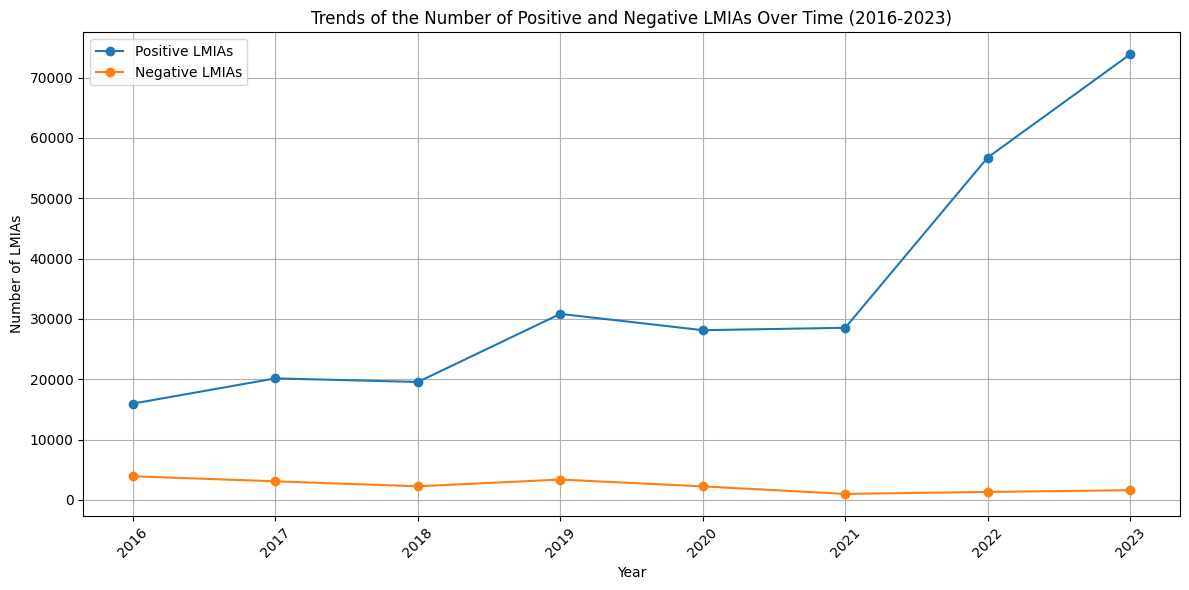

In [5]:


# Load the combined DataFrames
positive_lmia_df = pd.read_csv('Data/optionA/combined_lmia_data.csv')
negative_lmia_df = pd.read_csv('combined_negative_lmia_data.csv')

# Group by Year and count the number of LMIAs
positive_lmia_trends = positive_lmia_df.groupby('Year').size().reset_index(name='Number of Positive LMIAs')
negative_lmia_trends = negative_lmia_df.groupby('Year').size().reset_index(name='Number of Negative LMIAs')

# Merge the trends dataframes on Year
lmia_trends = pd.merge(positive_lmia_trends, negative_lmia_trends, on='Year', how='outer').fillna(0)

# Plot the trends
plt.figure(figsize=(12, 6))
plt.plot(lmia_trends['Year'], lmia_trends['Number of Positive LMIAs'], marker='o', label='Positive LMIAs')
plt.plot(lmia_trends['Year'], lmia_trends['Number of Negative LMIAs'], marker='o', label='Negative LMIAs')
plt.title('Trends of the Number of Positive and Negative LMIAs Over Time (2016-2023)')
plt.xlabel('Year')
plt.ylabel('Number of LMIAs')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Iskander\AppData\Local\Temp\ipykernel_15976\1921760870.py:2: DtypeWarning: Columns (1,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  positive_lmia_df = pd.read_csv('Data/optionA/combined_lmia_data.csv')
C:\Users\Iskander\AppData\Local\Temp\ipykernel_15976\1921760870.py:29: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Iskander\AppData\Local\Temp\ipykernel_15976\1921760870.py:29: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Iskander\AppData\Local\Temp\ipykernel_15976\1921760870.py:29: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Iskander\AppData\Local\Temp\ipykernel_15976\1921760870.py:29: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Iskander\AppData\Local\Temp\ipykernel_15976\1921760870.py:29: UserWarning: Tight layout not applied. The bottom and top m

<Figure size 1200x600 with 0 Axes>

C:\Users\Iskander\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Iskander\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Iskander\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Iskander\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


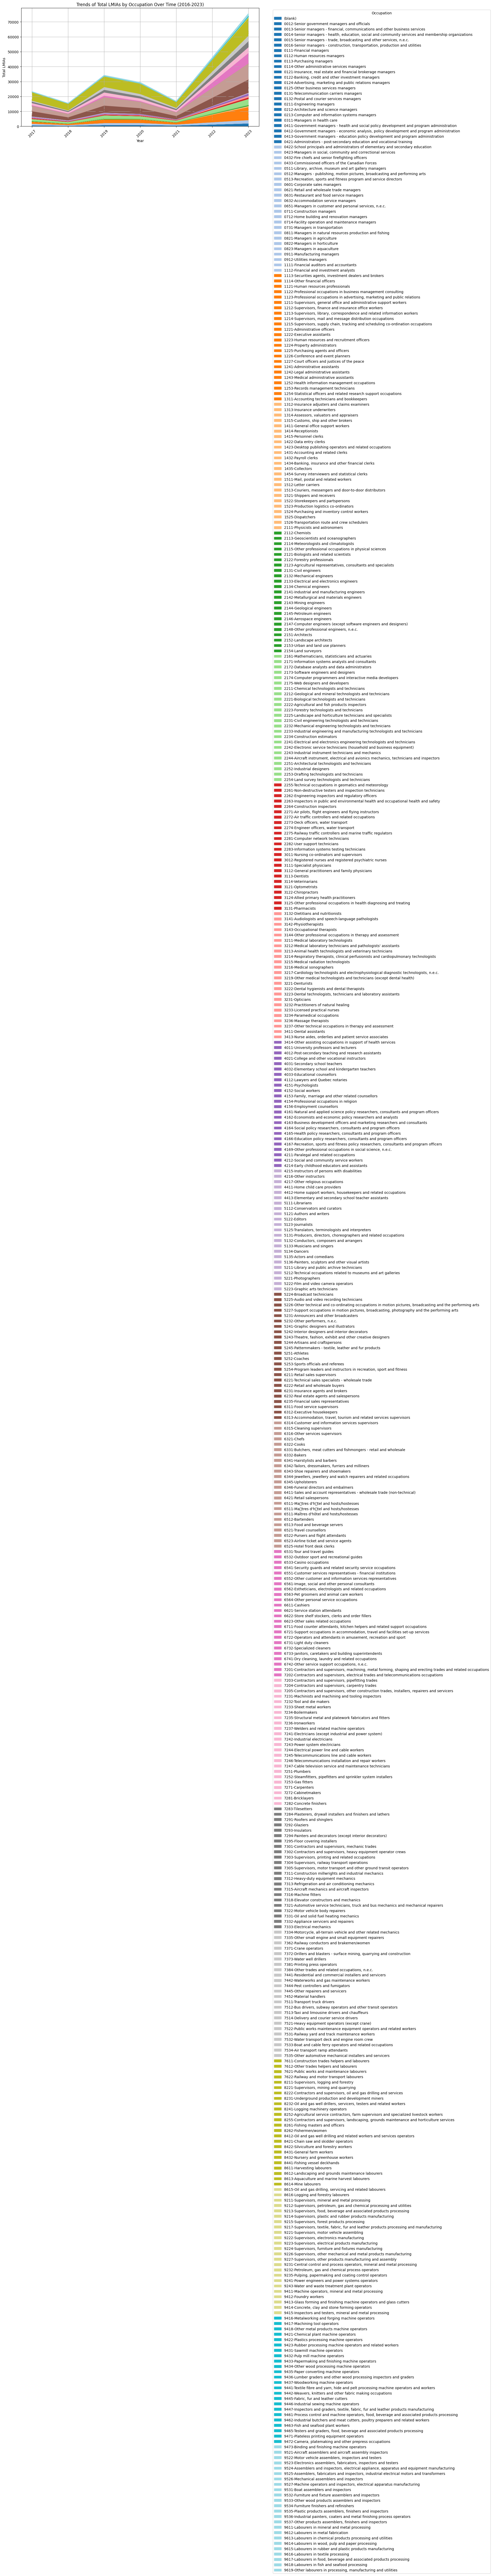

In [6]:


# Load the combined DataFrames
positive_lmia_df = pd.read_csv('Data/optionA/combined_lmia_data.csv')
negative_lmia_df = pd.read_csv('combined_negative_lmia_data.csv')

# Group by Year and Occupation, and count the number of LMIAs
positive_lmia_trends = positive_lmia_df.groupby(['Year', 'Occupation']).size().reset_index(name='Number of Positive LMIAs')
negative_lmia_trends = negative_lmia_df.groupby(['Year', 'Occupation']).size().reset_index(name='Number of Negative LMIAs')

# Merge the trends dataframes on Year and Occupation
lmia_trends = pd.merge(positive_lmia_trends, negative_lmia_trends, on=['Year', 'Occupation'], how='outer').fillna(0)

# Calculate the total LMIAs and the relative proportions
lmia_trends['Total LMIAs'] = lmia_trends['Number of Positive LMIAs'] + lmia_trends['Number of Negative LMIAs']
lmia_trends['Proportion Positive'] = lmia_trends['Number of Positive LMIAs'] / lmia_trends['Total LMIAs']
lmia_trends['Proportion Negative'] = lmia_trends['Number of Negative LMIAs'] / lmia_trends['Total LMIAs']

# Pivot the data for stacked area chart
lmia_pivot = lmia_trends.pivot_table(index='Year', columns='Occupation', values='Total LMIAs', aggfunc='sum').fillna(0)

# Plot the stacked area chart
plt.figure(figsize=(12, 6))
lmia_pivot.plot(kind='area', stacked=True, figsize=(12, 6), cmap='tab20')
plt.title('Trends of Total LMIAs by Occupation Over Time (2016-2023)')
plt.xlabel('Year')
plt.ylabel('Total LMIAs')
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:


import geopandas as gpd
import folium

# Load the combined DataFrames
positive_lmia_df = pd.read_csv('Data/optionA/combined_lmia_data.csv',low_memory=False)
negative_lmia_df = pd.read_csv('combined_negative_lmia_data.csv')

# Group by Province/Territory and count the number of LMIAs
positive_lmia_counts = positive_lmia_df.groupby('Province/Territory').size().reset_index(name='Number of Positive LMIAs')
negative_lmia_counts = negative_lmia_df.groupby('Province/Territory').size().reset_index(name='Number of Negative LMIAs')

# Load GeoJSON file for Canadian provinces/territories
canada_geojson = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/canada.geojson'

# Create a base map
m = folium.Map(location=[56.1304, -106.3468], zoom_start=4)

# Add choropleth layer for positive LMIAs
folium.Choropleth(
    geo_data=canada_geojson,
    name='choropleth',
    data=positive_lmia_counts,
    columns=['Province/Territory', 'Number of Positive LMIAs'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Positive LMIAs'
).add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

# Save the map to an HTML file
m.save('positive_lmia_choropleth.html')

# Create a base map for negative LMIAs
m_neg = folium.Map(location=[56.1304, -106.3468], zoom_start=4)

# Add choropleth layer for negative LMIAs
folium.Choropleth(
    geo_data=canada_geojson,
    name='choropleth',
    data=negative_lmia_counts,
    columns=['Province/Territory', 'Number of Negative LMIAs'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Negative LMIAs'
).add_to(m_neg)

# Add layer control
folium.LayerControl().add_to(m_neg)

# Save the map to an HTML file
m_neg.save('negative_lmia_choropleth.html')

In [8]:

import pandas as pd
import pgeocode

# Load the combined DataFrame
combined_lmia_df = pd.read_csv('Data/optionA/combined_lmia_data.csv', low_memory=False)

# Extract the postal code from the Address column
# Assuming the postal code is the last part of the address
combined_lmia_df['Postal Code'] = combined_lmia_df['Address'].str.extract(r'([A-Za-z]\d[A-Za-z] \d[A-Za-z]\d)')

# Initialize the pgeocode object for Canada
nomi = pgeocode.Nominatim('ca')

# Function to get the city from the postal code
def get_city(postal_code):
    if pd.isna(postal_code):
        return None
    location = nomi.query_postal_code(postal_code)
    return location['place_name']

# Apply the function to the Postal Code column to create the City column
combined_lmia_df['City'] = combined_lmia_df['Postal Code'].apply(get_city)

# Display the updated DataFrame
combined_lmia_df.head()

# Save the updated DataFrame to a new CSV file
combined_lmia_df.to_csv('Data/optionA/combined_lmia_data_with_city.csv', index=False)

In [9]:
positive_lmia_df.head(10)

,Province/Territory,Program Stream,Employer,Address,Occupation,Incorporate Status,Approved LMIAs,Approved Positions,Year,Date
0,Newfoundland and Labrador,High Wage,78075 Newfoundland & Labrador Inc,"Fogo, NL A0G 2B0",0212-Architecture and science managers,Unknown,1.0,1.0,2023,October 2023
1,Newfoundland and Labrador,High Wage,AB Complex Inc.,"Gander, NL A1V 1X3","0124-Advertising, marketing and public relatio...",Unknown,1.0,1.0,2023,October 2023
2,Newfoundland and Labrador,High Wage,AB Complex Inc.,"Gander, NL A1V 1X3",1311-Accounting technicians and bookkeepers,Unknown,1.0,1.0,2023,October 2023
3,Newfoundland and Labrador,High Wage,Central Health,"Grand Falls-Windsor, NL A2A 1Y4",3111-Specialist physicians,Unknown,3.0,3.0,2023,October 2023
4,Newfoundland and Labrador,High Wage,Dory's Way Inc,"Whitbourne, NL A0B 3K0",1241-Administrative assistants,Unknown,1.0,1.0,2023,October 2023
5,Newfoundland and Labrador,High Wage,New Fun Land Limited,"Gander, NL A1V 1W7",4214-Early childhood educators and assistants,Unknown,1.0,2.0,2023,October 2023
6,Newfoundland and Labrador,High Wage,Western Regional Health Authority,"Corner Brook, NL A2H 6J7",3111-Specialist physicians,Unknown,2.0,2.0,2023,October 2023
7,Newfoundland and Labrador,Low Wage,13744582 Canada Inc.,"Mount Pearl, NL A1N 5B2",7514-Delivery and courier service drivers,Unknown,1.0,1.0,2023,October 2023
8,Newfoundland and Labrador,Low Wage,3T's Limited,"Woody Point, NL A0K 1P0",9463-Fish and seafood plant workers,Corporation,1.0,3.0,2023,October 2023
9,Newfoundland and Labrador,Low Wage,76361 NL Inc.,"Deer Lake, NL A8A 1E6",6311-Food service supervisors,Unknown,1.0,1.0,2023,October 2023


In [10]:
import pandas as pd

# Assuming positive_lmia_df is already loaded
# Extract the last 7 characters of the Address column and save it in a new column Post Code
positive_lmia_df['Post Code'] = positive_lmia_df['Address'].str[-7:]

# Extract the first four characters of the Occupation column and save it as NOC
positive_lmia_df['NOC'] = positive_lmia_df['Occupation'].str[:4]

# Display the updated DataFrame
positive_lmia_df.head()
positive_lmia_df.to_csv('positive_lmia_df.csv',index=False)

In [11]:
positive_lmia_df[100:109]

,Province/Territory,Program Stream,Employer,Address,Occupation,Incorporate Status,Approved LMIAs,Approved Positions,Year,Date,Post Code,NOC
100,Nova Scotia,High Wage,3289828 NS LTD,"SACKVILLE, NS B4C 2N1",7322-Motor vehicle body repairers,Unknown,1.0,2.0,2023,October 2023,B4C 2N1,7322
101,Nova Scotia,High Wage,3291918 NS Limited,"Halifax, NS B4B 0S7","0014-Senior managers - health, education, soci...",Unknown,1.0,1.0,2023,October 2023,B4B 0S7,0014
102,Nova Scotia,High Wage,3311267 Nova Scotia Ltd.,"Aberdeen, NS B0E 3M0",0632-Accommodation service managers,Unknown,1.0,1.0,2023,October 2023,B0E 3M0,0632
103,Nova Scotia,High Wage,4381149 NOVA SCOTIA INC,"BADDECK, NS B0E 1B0",0632-Accommodation service managers,Unknown,1.0,1.0,2023,October 2023,B0E 1B0,0632
104,Nova Scotia,High Wage,720968 NB LTD,"Halifax, NS B3L 4R3",6211-Retail sales supervisors,Unknown,1.0,1.0,2023,October 2023,B3L 4R3,6211
105,Nova Scotia,High Wage,ADDA INDIAN EATERY INC.,"Halifax, NS B3J 3M7",1241-Administrative assistants,Unknown,1.0,1.0,2023,October 2023,B3J 3M7,1241
106,Nova Scotia,High Wage,Atlantic George Limited,"Halifax, NS B3M 2K7","7205-Contractors and supervisors, other constr...",Unknown,1.0,1.0,2023,October 2023,B3M 2K7,7205
107,Nova Scotia,High Wage,Blue Bird Fueling INC,"STEWIACKE, NS B0N 2J0",6211-Retail sales supervisors,Unknown,1.0,2.0,2023,October 2023,B0N 2J0,6211
108,Nova Scotia,High Wage,BTTC (Canada) Incorporated,"Halifax, NS B3J 3R7",1122-Professional occupations in business mana...,Unknown,2.0,2.0,2023,October 2023,B3J 3R7,1122


In [12]:
df = pd.read_csv('Data/tfwp2023_annual_table_11_e.csv',skiprows=1)
df.head()
df.to_csv('Empoyer_table11.csv', index=False)

In [13]:
df = pd.read_csv('Data/tfwp2023_annual_table_12_e.csv',skiprows=1)
df.head()
df.to_csv('Empoyer_table12.csv', index=False)

In [14]:
df = pd.read_csv('Data/tfwp2023_annual_table_13_e.csv',skiprows=1)
df.head(10)
df.to_csv('Empoyer_table13.csv', index=False)

In [17]:
df = pd.read_csv('/Users/ay/Desktop/labour market impact/Labor-Market-Analysis/Amin/Data/optionA/part2/tfwp2023_annual_table_25_e.csv', encoding='latin1',skiprows=0)
df.head(10)
df.head(12)

FileNotFoundError: [Errno 2] No such file or directory: 'Amin/Data/optionA/part2/tfwp2023_annual_table_25_e.csv'

In [18]:
import pgeocode 
# Initialize the pgeocode object for Canada 
nomi = pgeocode.Nominatim('ca') # Query information about the postal code 
postal_code_info = nomi.query_postal_code("M5G 2C3") # Example postal code # Extract the city from the postal code information 
city = postal_code_info['place_name'] 
print(f"City: {city}")

City: Downtown Toronto (Central Bay Street)


In [19]:

import pgeocode


positive_lmia_df['Post Code'] = positive_lmia_df['Address'].str[-7:]

# Initialize the pgeocode object for Canada
nomi = pgeocode.Nominatim('ca')

# Function to get the city from the postal code
def get_city(postal_code):
    if pd.isna(postal_code):
        return None
    postal_code_info = nomi.query_postal_code(postal_code)
    return postal_code_info['place_name']

# Apply the function to the Post Code column to create the City column
positive_lmia_df['City'] = positive_lmia_df['Post Code'].apply(get_city)

# Display the updated DataFrame
positive_lmia_df.head()

# Save the updated DataFrame to a new CSV file
positive_lmia_df.to_csv('positive_lmia_data_with_city.csv', index=False)

,Province/Territory,Program Stream,Employer,Address,Occupation,Incorporate Status,Approved LMIAs,Approved Positions,Year,Date,Post Code,NOC,City,Postal Code 1st char,first_char_postal_code_x,"Province, territory or region_x",first_char_postal_code_y,"Province, territory or region_y",first_char_postal_code,"Province, territory or region"
0,Newfoundland and Labrador,High Wage,78075 Newfoundland & Labrador Inc,"Fogo, NL A0G 2B0",0212-Architecture and science managers,Unknown,1.0,1.0,2023,October 2023,A0G 2B0,0212,Northeast Newfoundland (Lewisporte),A,A,Newfoundland and Labrador,A,Newfoundland and Labrador,A,Newfoundland and Labrador
1,Newfoundland and Labrador,High Wage,AB Complex Inc.,"Gander, NL A1V 1X3","0124-Advertising, marketing and public relatio...",Unknown,1.0,1.0,2023,October 2023,A1V 1X3,0124,Gander,A,A,Newfoundland and Labrador,A,Newfoundland and Labrador,A,Newfoundland and Labrador
2,Newfoundland and Labrador,High Wage,AB Complex Inc.,"Gander, NL A1V 1X3",1311-Accounting technicians and bookkeepers,Unknown,1.0,1.0,2023,October 2023,A1V 1X3,1311,Gander,A,A,Newfoundland and Labrador,A,Newfoundland and Labrador,A,Newfoundland and Labrador
3,Newfoundland and Labrador,High Wage,Central Health,"Grand Falls-Windsor, NL A2A 1Y4",3111-Specialist physicians,Unknown,3.0,3.0,2023,October 2023,A2A 1Y4,3111,Grand Falls,A,A,Newfoundland and Labrador,A,Newfoundland and Labrador,A,Newfoundland and Labrador
4,Newfoundland and Labrador,High Wage,Dory's Way Inc,"Whitbourne, NL A0B 3K0",1241-Administrative assistants,Unknown,1.0,1.0,2023,October 2023,A0B 3K0,1241,Western Avalon Peninsula (Argentia),A,A,Newfoundland and Labrador,A,Newfoundland and Labrador,A,Newfoundland and Labrador


In [20]:

# Count the unique values in the City column
unique_cities_count = positive_lmia_df['City'].nunique()

# Display the count of unique cities
unique_cities_count

1569

In [21]:
positive_lmia_df.head()

,Province/Territory,Program Stream,Employer,Address,Occupation,Incorporate Status,Approved LMIAs,Approved Positions,Year,Date,Post Code,NOC,City
0,Newfoundland and Labrador,High Wage,78075 Newfoundland & Labrador Inc,"Fogo, NL A0G 2B0",0212-Architecture and science managers,Unknown,1.0,1.0,2023,October 2023,A0G 2B0,0212,Northeast Newfoundland (Lewisporte)
1,Newfoundland and Labrador,High Wage,AB Complex Inc.,"Gander, NL A1V 1X3","0124-Advertising, marketing and public relatio...",Unknown,1.0,1.0,2023,October 2023,A1V 1X3,0124,Gander
2,Newfoundland and Labrador,High Wage,AB Complex Inc.,"Gander, NL A1V 1X3",1311-Accounting technicians and bookkeepers,Unknown,1.0,1.0,2023,October 2023,A1V 1X3,1311,Gander
3,Newfoundland and Labrador,High Wage,Central Health,"Grand Falls-Windsor, NL A2A 1Y4",3111-Specialist physicians,Unknown,3.0,3.0,2023,October 2023,A2A 1Y4,3111,Grand Falls
4,Newfoundland and Labrador,High Wage,Dory's Way Inc,"Whitbourne, NL A0B 3K0",1241-Administrative assistants,Unknown,1.0,1.0,2023,October 2023,A0B 3K0,1241,Western Avalon Peninsula (Argentia)


In [22]:
# Mapping postal code to region

regions_df = pd.read_csv("../Amin/Data/first char of postal code to region.csv")
positive_lmia_df['Postal Code 1st char'] = positive_lmia_df['Post Code'].str[0]

# positive_lmia_df = pd.merge(positive_lmia_df,regions_df, left_on='Postal Code 1st char', right_on='first_char_postal_code',how='left')
# positive_lmia_df.head()

In [209]:
positive_lmia_df.head()

,Province/Territory,Program Stream,Employer,Address,Occupation,Incorporate Status,Approved LMIAs,Approved Positions,Year,Date,Post Code,NOC,City,Postal Code 1st char,first_char_postal_code_x,"Province, territory or region_x",first_char_postal_code_y,"Province, territory or region_y",first_char_postal_code,"Province, territory or region"
0,Newfoundland and Labrador,High Wage,78075 Newfoundland & Labrador Inc,"Fogo, NL A0G 2B0",0212-Architecture and science managers,Unknown,1.0,1.0,2023,October 2023,A0G 2B0,0212,Northeast Newfoundland (Lewisporte),A,A,Newfoundland and Labrador,A,Newfoundland and Labrador,A,Newfoundland and Labrador
1,Newfoundland and Labrador,High Wage,AB Complex Inc.,"Gander, NL A1V 1X3","0124-Advertising, marketing and public relatio...",Unknown,1.0,1.0,2023,October 2023,A1V 1X3,0124,Gander,A,A,Newfoundland and Labrador,A,Newfoundland and Labrador,A,Newfoundland and Labrador
2,Newfoundland and Labrador,High Wage,AB Complex Inc.,"Gander, NL A1V 1X3",1311-Accounting technicians and bookkeepers,Unknown,1.0,1.0,2023,October 2023,A1V 1X3,1311,Gander,A,A,Newfoundland and Labrador,A,Newfoundland and Labrador,A,Newfoundland and Labrador
3,Newfoundland and Labrador,High Wage,Central Health,"Grand Falls-Windsor, NL A2A 1Y4",3111-Specialist physicians,Unknown,3.0,3.0,2023,October 2023,A2A 1Y4,3111,Grand Falls,A,A,Newfoundland and Labrador,A,Newfoundland and Labrador,A,Newfoundland and Labrador
4,Newfoundland and Labrador,High Wage,Dory's Way Inc,"Whitbourne, NL A0B 3K0",1241-Administrative assistants,Unknown,1.0,1.0,2023,October 2023,A0B 3K0,1241,Western Avalon Peninsula (Argentia),A,A,Newfoundland and Labrador,A,Newfoundland and Labrador,A,Newfoundland and Labrador


In [23]:
positive_lmia_5 = pd.read_csv('df_positive_5digit.csv', low_memory=False)
positive_lmia_5.head()

,Unnamed: 0,Province/Territory,Program Stream,Employer,Address,Occupation,Incorporate Status,Approved LMIAs,Approved Positions,Year,Date,Post Code,NOC,City,NOC 2016 V1.3 Code,NOC 2016 V1.3 Title,NOC 2021 V1.0 Code,NOC 2021 V1.0 Title,Teer,Month
0,0,Newfoundland and Labrador,High Wage,78075 Newfoundland & Labrador Inc,"Fogo, NL A0G 2B0",0212-Architecture and science managers,Unknown,1.0,1.0,2023,October 2023,A0G 2B0,0212,Northeast Newfoundland (Lewisporte),212.0,Architecture and science managers,20011.0,Architecture and science managers,0.0,October
1,1,Newfoundland and Labrador,High Wage,AB Complex Inc.,"Gander, NL A1V 1X3","0124-Advertising, marketing and public relatio...",Unknown,1.0,1.0,2023,October 2023,A1V 1X3,0124,Gander,124.0,"Advertising, marketing and public relations ma...",10022.0,"Advertising, marketing and public relations ma...",0.0,October
2,2,Newfoundland and Labrador,High Wage,AB Complex Inc.,"Gander, NL A1V 1X3",1311-Accounting technicians and bookkeepers,Unknown,1.0,1.0,2023,October 2023,A1V 1X3,1311,Gander,1311.0,Accounting technicians and bookkeepers,12200.0,Accounting technicians and bookkeepers,2.0,October
3,3,Newfoundland and Labrador,High Wage,Central Health,"Grand Falls-Windsor, NL A2A 1Y4",3111-Specialist physicians,Unknown,3.0,3.0,2023,October 2023,A2A 1Y4,3111,Grand Falls,3111.0,Specialist physicians,31100.0,Specialists in clinical and laboratory medicine,1.0,October
4,4,Newfoundland and Labrador,High Wage,Central Health,"Grand Falls-Windsor, NL A2A 1Y4",3111-Specialist physicians,Unknown,3.0,3.0,2023,October 2023,A2A 1Y4,3111,Grand Falls,3111.0,Specialist physicians,31101.0,Specialists in surgery,1.0,October


In [24]:
# Mapping postal code to region

regions_df = pd.read_csv("../Amin/Data/first char of postal code to region.csv")
positive_lmia_5['Postal Code 1st char'] = positive_lmia_5['Post Code'].str[0]

positive_lmia_5 = pd.merge(positive_lmia_5,regions_df, left_on='Postal Code 1st char', right_on='first_char_postal_code',how='left')


In [25]:
positive_lmia_5.head()


,Unnamed: 0,Province/Territory,Program Stream,Employer,Address,Occupation,Incorporate Status,Approved LMIAs,Approved Positions,Year,...,City,NOC 2016 V1.3 Code,NOC 2016 V1.3 Title,NOC 2021 V1.0 Code,NOC 2021 V1.0 Title,Teer,Month,Postal Code 1st char,first_char_postal_code,"Province, territory or region"
0,0,Newfoundland and Labrador,High Wage,78075 Newfoundland & Labrador Inc,"Fogo, NL A0G 2B0",0212-Architecture and science managers,Unknown,1.0,1.0,2023,...,Northeast Newfoundland (Lewisporte),212.0,Architecture and science managers,20011.0,Architecture and science managers,0.0,October,A,A,Newfoundland and Labrador
1,1,Newfoundland and Labrador,High Wage,AB Complex Inc.,"Gander, NL A1V 1X3","0124-Advertising, marketing and public relatio...",Unknown,1.0,1.0,2023,...,Gander,124.0,"Advertising, marketing and public relations ma...",10022.0,"Advertising, marketing and public relations ma...",0.0,October,A,A,Newfoundland and Labrador
2,2,Newfoundland and Labrador,High Wage,AB Complex Inc.,"Gander, NL A1V 1X3",1311-Accounting technicians and bookkeepers,Unknown,1.0,1.0,2023,...,Gander,1311.0,Accounting technicians and bookkeepers,12200.0,Accounting technicians and bookkeepers,2.0,October,A,A,Newfoundland and Labrador
3,3,Newfoundland and Labrador,High Wage,Central Health,"Grand Falls-Windsor, NL A2A 1Y4",3111-Specialist physicians,Unknown,3.0,3.0,2023,...,Grand Falls,3111.0,Specialist physicians,31100.0,Specialists in clinical and laboratory medicine,1.0,October,A,A,Newfoundland and Labrador
4,4,Newfoundland and Labrador,High Wage,Central Health,"Grand Falls-Windsor, NL A2A 1Y4",3111-Specialist physicians,Unknown,3.0,3.0,2023,...,Grand Falls,3111.0,Specialist physicians,31101.0,Specialists in surgery,1.0,October,A,A,Newfoundland and Labrador


In [26]:
# Fill NaNs by forward-filling across the entire DataFrame
positive_lmia_5_forward_fill = positive_lmia_5.copy()
positive_lmia_5_forward_fill = positive_lmia_5_forward_fill.fillna(method='ffill')

C:\Users\Iskander\AppData\Local\Temp\ipykernel_15976\1687013837.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  positive_lmia_5_forward_fill = positive_lmia_5_forward_fill.fillna(method='ffill')


In [27]:
positive_lmia_5_forward_fill.to_csv('positive_lmia_final.csv')

In [28]:
df = pd.read_csv('positive_lmia_final.csv')
df.head()

C:\Users\Iskander\AppData\Local\Temp\ipykernel_15976\1965492450.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('positive_lmia_final.csv')


,Unnamed: 0.1,Unnamed: 0,Province/Territory,Program Stream,Employer,Address,Occupation,Incorporate Status,Approved LMIAs,Approved Positions,...,City,NOC 2016 V1.3 Code,NOC 2016 V1.3 Title,NOC 2021 V1.0 Code,NOC 2021 V1.0 Title,Teer,Month,Postal Code 1st char,first_char_postal_code,"Province, territory or region"
0,0,0,Newfoundland and Labrador,High Wage,78075 Newfoundland & Labrador Inc,"Fogo, NL A0G 2B0",0212-Architecture and science managers,Unknown,1.0,1.0,...,Northeast Newfoundland (Lewisporte),212.0,Architecture and science managers,20011.0,Architecture and science managers,0.0,October,A,A,Newfoundland and Labrador
1,1,1,Newfoundland and Labrador,High Wage,AB Complex Inc.,"Gander, NL A1V 1X3","0124-Advertising, marketing and public relatio...",Unknown,1.0,1.0,...,Gander,124.0,"Advertising, marketing and public relations ma...",10022.0,"Advertising, marketing and public relations ma...",0.0,October,A,A,Newfoundland and Labrador
2,2,2,Newfoundland and Labrador,High Wage,AB Complex Inc.,"Gander, NL A1V 1X3",1311-Accounting technicians and bookkeepers,Unknown,1.0,1.0,...,Gander,1311.0,Accounting technicians and bookkeepers,12200.0,Accounting technicians and bookkeepers,2.0,October,A,A,Newfoundland and Labrador
3,3,3,Newfoundland and Labrador,High Wage,Central Health,"Grand Falls-Windsor, NL A2A 1Y4",3111-Specialist physicians,Unknown,3.0,3.0,...,Grand Falls,3111.0,Specialist physicians,31100.0,Specialists in clinical and laboratory medicine,1.0,October,A,A,Newfoundland and Labrador
4,4,4,Newfoundland and Labrador,High Wage,Central Health,"Grand Falls-Windsor, NL A2A 1Y4",3111-Specialist physicians,Unknown,3.0,3.0,...,Grand Falls,3111.0,Specialist physicians,31101.0,Specialists in surgery,1.0,October,A,A,Newfoundland and Labrador


In [29]:
df.isnull().sum()

Unnamed: 0.1                     0
Unnamed: 0                       0
Province/Territory               0
Program Stream                   0
Employer                         0
Address                          0
Occupation                       0
Incorporate Status               0
Approved LMIAs                   0
Approved Positions               0
Year                             0
Date                             0
Post Code                        0
NOC                              0
City                             0
NOC 2016 V1.3 Code               0
NOC 2016 V1.3 Title              0
NOC 2021 V1.0 Code               0
NOC 2021 V1.0 Title              0
Teer                             0
Month                            0
Postal Code 1st char             0
first_char_postal_code           0
Province, territory or region    0
dtype: int64

In [30]:
negative_lmia_5 = pd.read_csv('negative_lmia_5-digit.csv', low_memory=False)
negative_lmia_5.head()



,Unnamed: 0,Province/Territory,Program Stream,Employer,Address,Occupation,Incorporate Status,Requested LMIAs,Requested Positions,Year,Date,Month,ZipCode,NOC 2016 V1.3 Code,NOC 2016 V1.3 Title,NOC 2021 V1.0 Code,NOC 2021 V1.0 Title,Teer
0,0,Newfoundland and Labrador,Low Wage,Blair Holdings Limited,"Corner Brook, NL A2H 4C5",6731-Light duty cleaners,Unknown,1.0,2.0,2023,October 2023,October,A2H 4C5,6731.0,Light duty cleaners,65310.0,Light duty cleaners,5.0
1,1,Prince Edward Island,Primary Agriculture,Pure Pork Genetics Ltd.,"montague, PE C0A 1R0",8431-General farm workers,Unknown,1.0,3.0,2023,October 2023,October,C0A 1R0,8431.0,General farm workers,84120.0,Specialized livestock workers and farm machine...,4.0
2,2,Prince Edward Island,Primary Agriculture,Pure Pork Genetics Ltd.,"montague, PE C0A 1R0",8431-General farm workers,Unknown,1.0,3.0,2023,October 2023,October,C0A 1R0,8431.0,General farm workers,85100.0,Livestock labourers,5.0
3,3,Prince Edward Island,Primary Agriculture,Pure Pork Genetics Ltd.,"montague, PE C0A 1R0",8431-General farm workers,Unknown,1.0,3.0,2023,October 2023,October,C0A 1R0,8431.0,General farm workers,85101.0,Harvesting labourers,5.0
4,4,Nova Scotia,Low Wage,3323061 Nova Scotia Limited,"HALIFAX, NS B3J 0E8",1311-Accounting technicians and bookkeepers,Unknown,1.0,1.0,2023,October 2023,October,B3J 0E8,1311.0,Accounting technicians and bookkeepers,12200.0,Accounting technicians and bookkeepers,2.0


In [35]:
# Mapping postal code to region

regions_df = pd.read_csv("../Amin/Data/first char of postal code to region.csv")
negative_lmia_5['Postal Code 1st char'] = negative_lmia_5['ZipCode'].str[0]

negative_lmia_5 = pd.merge(negative_lmia_5,regions_df, left_on='Postal Code 1st char', right_on='first_char_postal_code',how='left')

In [36]:
negative_lmia_5.head()


,Unnamed: 0,Province/Territory,Program Stream,Employer,Address,Occupation,Incorporate Status,Requested LMIAs,Requested Positions,Year,...,NOC 2016 V1.3 Code,NOC 2016 V1.3 Title,NOC 2021 V1.0 Code,NOC 2021 V1.0 Title,Teer,Postal Code 1st char,first_char_postal_code_x,"Province, territory or region_x",first_char_postal_code_y,"Province, territory or region_y"
0,0,Newfoundland and Labrador,Low Wage,Blair Holdings Limited,"Corner Brook, NL A2H 4C5",6731-Light duty cleaners,Unknown,1.0,2.0,2023,...,6731.0,Light duty cleaners,65310.0,Light duty cleaners,5.0,A,A,Newfoundland and Labrador,A,Newfoundland and Labrador
1,1,Prince Edward Island,Primary Agriculture,Pure Pork Genetics Ltd.,"montague, PE C0A 1R0",8431-General farm workers,Unknown,1.0,3.0,2023,...,8431.0,General farm workers,84120.0,Specialized livestock workers and farm machine...,4.0,C,C,Prince Edward Island,C,Prince Edward Island
2,2,Prince Edward Island,Primary Agriculture,Pure Pork Genetics Ltd.,"montague, PE C0A 1R0",8431-General farm workers,Unknown,1.0,3.0,2023,...,8431.0,General farm workers,85100.0,Livestock labourers,5.0,C,C,Prince Edward Island,C,Prince Edward Island
3,3,Prince Edward Island,Primary Agriculture,Pure Pork Genetics Ltd.,"montague, PE C0A 1R0",8431-General farm workers,Unknown,1.0,3.0,2023,...,8431.0,General farm workers,85101.0,Harvesting labourers,5.0,C,C,Prince Edward Island,C,Prince Edward Island
4,4,Nova Scotia,Low Wage,3323061 Nova Scotia Limited,"HALIFAX, NS B3J 0E8",1311-Accounting technicians and bookkeepers,Unknown,1.0,1.0,2023,...,1311.0,Accounting technicians and bookkeepers,12200.0,Accounting technicians and bookkeepers,2.0,B,B,Nova Scotia,B,Nova Scotia


In [33]:
# Fill NaNs by forward-filling across the entire DataFrame
negative_lmia_5_forward_fill = negative_lmia_5.copy()
negative_lmia_5_forward_fill = negative_lmia_5_forward_fill.fillna(method='ffill')

C:\Users\Iskander\AppData\Local\Temp\ipykernel_15976\614938171.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  negative_lmia_5_forward_fill = negative_lmia_5_forward_fill.fillna(method='ffill')


In [34]:
negative_lmia_5_forward_fill.to_csv('negative_lmia_final.csv')